### **Simple Linear Regression** :
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression tesk as it involves just two variables


In [1]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Reading data from remote link
link = 'http://bit.ly/w-data'
data = pd.read_csv(link)
print("Data Imported Successfully")


Data Imported Successfully


In [3]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [4]:
data.columns

Index(['Hours', 'Scores'], dtype='object')

Let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data. We can create the plot with the following script:

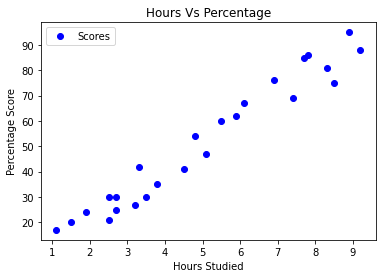

In [5]:
data.plot(x='Hours', y='Scores',color = 'blue', style='o')
plt.title("Hours Vs Percentage")
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

**From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.**

### **Preparing the data**

The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [6]:
 X = data.iloc[:, :-1].values
 Y = data.iloc[:, 1].values


In [7]:
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [8]:
Y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86])

Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [9]:
from sklearn.model_selection import train_test_split  
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                            test_size=0.2, random_state=0)

### **Training the Algorithm**
We have split our data into training and testing sets, and now is finally the time to train our algorithm. 

In [10]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, Y_train) 

print("Training completed successfully.")

Training completed successfully.


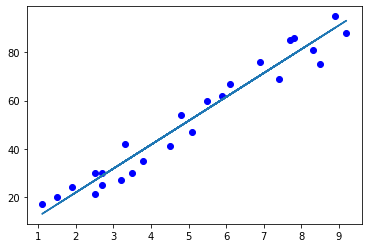

In [11]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, Y, color='blue')
plt.plot(X, line);
plt.show()

### **Making Predictions**
Now that we have trained our algorithm, it's time to make some predictions.


In [12]:
print(X_test) #testing data in hour

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [13]:
y_pred = regressor.predict(X_test) #predicting the scores 

In [14]:
# Comparing Actual Vs Predicted
df = pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [15]:
# You can also test with your own data 
dataset = np.array(9.25)
dataset = dataset.reshape(-1,1)
predicting = regressor.predict(dataset)
print("If the student studies for 9.25 hrs a day, then the score is ()", format(predicting))

If the student studies for 9.25 hrs a day, then the score is () [93.69173249]


### **Evaluating the Model**
The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.


In [16]:
from sklearn import metrics 
print("Mean Absolute Error: ", metrics.mean_absolute_error(Y_test,y_pred))

Mean Absolute Error:  4.183859899002982


In [17]:
from sklearn.metrics import r2_score
print("The R-Square of the model is: ", r2_score(Y_test, y_pred))

The R-Square of the model is:  0.9454906892105354
